# Google Analytics Sales data Analysis

### Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfmc = pd.read_csv('google-analytics-public-analyst-case-study_-_marketing_channel_timeseries.csv')
dfpd = pd.read_csv('google-analytics-public-analyst-case-study_-_pageview_data_bookers.csv')

### marketing_channel_timeseries data description and cleaning

In [3]:
dfmc.head()

,date_week,isMobile,source,medium,referralPath,region,visits,bounces,transactions,totalTransactionRevenue
0,25/06/2017,False,google,organic,NaN,California,24,4,1,15990000
1,25/06/2017,True,google,organic,NaN,California,37,15,0,0
2,25/06/2017,True,google,organic,NaN,Texas,12,6,0,0
3,25/06/2017,False,google,organic,NaN,New York,9,2,0,0
4,25/06/2017,False,(direct),(none),NaN,not available in demo dataset,32,10,0,0


In [4]:
dfmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date_week                1737 non-null   object
 1   isMobile                 1737 non-null   bool  
 2   source                   1737 non-null   object
 3   medium                   1737 non-null   object
 4   referralPath             1014 non-null   object
 5   region                   1737 non-null   object
 6   visits                   1737 non-null   int64 
 7   bounces                  1737 non-null   int64 
 8   transactions             1737 non-null   int64 
 9   totalTransactionRevenue  1737 non-null   int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 124.0+ KB


In [5]:
dfmc.medium.value_counts()

referral     871
(none)       328
organic      266
cpc          120
cpm           88
affiliate     63
(not set)      1
Name: medium, dtype: int64

- We have only one (not set) values in medium and i will be changing it to (none) as it affects bounce rate calculation

In [6]:
dfmc.medium.replace('(not set)', '(none)',inplace= True)

- Dealing with missing values in referral by replacing them with Unknown values

In [7]:
dfmc.referralPath.head(10)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8          /
9    /gopher
Name: referralPath, dtype: object

In [8]:
dfmc.referralPath.fillna('Unknown', inplace= True)
dfmc.referralPath.replace('/', 'Unknown',inplace= True)

- Here we will be replacing 'not available in demo dataset' and '(not set)' values of region to Unknown for uniformity.

In [9]:
dfmc.region.replace('not available in demo dataset', 'Unknown',inplace=True)
dfmc.region.replace('(not set)', 'Unknown',inplace=True)

- Total transaction revenue is expressed as the value passed to Analytics multiplied by 10^6 so dividing it by 10^6 to bring it back to normal values

In [10]:
dfmc['transactionRevenue'] = dfmc.totalTransactionRevenue / 1000000
dfmc = dfmc.drop(['totalTransactionRevenue'],axis=1)

In [11]:
dfmc.head()

,date_week,isMobile,source,medium,referralPath,region,visits,bounces,transactions,transactionRevenue
0,25/06/2017,False,google,organic,Unknown,California,24,4,1,15.99
1,25/06/2017,True,google,organic,Unknown,California,37,15,0,0.00
2,25/06/2017,True,google,organic,Unknown,Texas,12,6,0,0.00
3,25/06/2017,False,google,organic,Unknown,New York,9,2,0,0.00
4,25/06/2017,False,(direct),(none),Unknown,Unknown,32,10,0,0.00


### pageview_data_bookers data description and cleaning

In [12]:
dfpd.head()

,fullVisitorId,transactions,total_visitor_transactions,visitId,visitNumber,hitNumber,pagePath
0,6.911330e+15,NaN,1,1500268117,1,1,/home
1,6.911330e+15,NaN,1,1500268117,1,2,/home
2,6.911330e+15,NaN,1,1500268117,1,3,/home
3,6.911330e+15,NaN,1,1500268117,1,4,/google+redesign/apparel/mens+outerwear/androi...
4,6.911330e+15,NaN,1,1500268117,1,5,/google+redesign/apparel/women+s+google+yoga+j...


In [13]:
dfpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36165 entries, 0 to 36164
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fullVisitorId               36165 non-null  float64
 1   transactions                25534 non-null  float64
 2   total_visitor_transactions  36165 non-null  int64  
 3   visitId                     36165 non-null  int64  
 4   visitNumber                 36165 non-null  int64  
 5   hitNumber                   36165 non-null  int64  
 6   pagePath                    36165 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.9+ MB


- Replacing all transactions with null values to 0 which indicates no transactions

In [14]:
dfpd.transactions.fillna(0, inplace = True)

### Which marketing source delivers the most bookings?

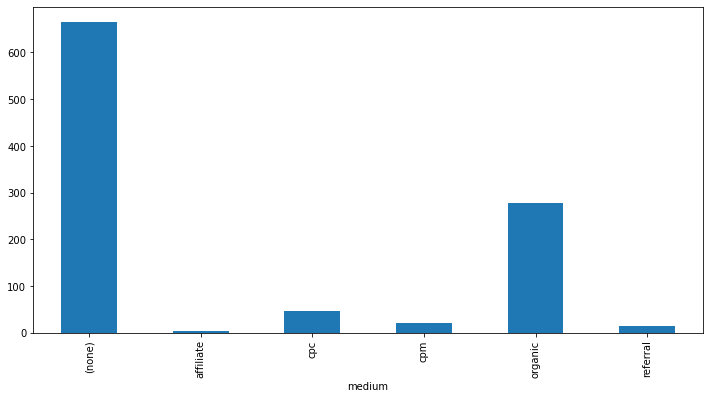

In [15]:
plt.figure(figsize=(12,6))
dfmc.groupby('medium')['transactions'].sum().plot.bar()

- We have the highest number of transctions from (none) which is direct visits and organic being the next.

### How does bounce rate vary by marketing channel (source & medium)? Are the differences significant?

- Bounce rate can be calculated as single-page sessions divided by all sessions or the percentage of all sessions on your site in which users viewed only a single page and triggered only a single request to the Analytics server. So i will be dividing the 'bounces' by 'visit' to obtain bounce rate.

In [16]:
# Calculating bounce rate into a new column
dfmc['bounceRate'] = (dfmc.bounces/dfmc.visits)*100

In [17]:
dfmc.head()

,date_week,isMobile,source,medium,referralPath,region,visits,bounces,transactions,transactionRevenue,bounceRate
0,25/06/2017,False,google,organic,Unknown,California,24,4,1,15.99,16.666667
1,25/06/2017,True,google,organic,Unknown,California,37,15,0,0.00,40.540541
2,25/06/2017,True,google,organic,Unknown,Texas,12,6,0,0.00,50.000000
3,25/06/2017,False,google,organic,Unknown,New York,9,2,0,0.00,22.222222
4,25/06/2017,False,(direct),(none),Unknown,Unknown,32,10,0,0.00,31.250000


In [18]:
# bounce rate for different sources and mediums
dfmc.groupby('medium')['bounceRate'].mean()

medium
(none)       38.536736
affiliate    58.269009
cpc          35.406382
cpm          35.629208
organic      38.636131
referral     52.981571
Name: bounceRate, dtype: float64

- The bounce Rates vary from different marketing channels, while direct or (none), cpc and cpm and organic have similar bounce rates, affiliate marketing and referral have a higher bounce rates.

### Which factors most strongly influence conversion rate (transactions / visit)

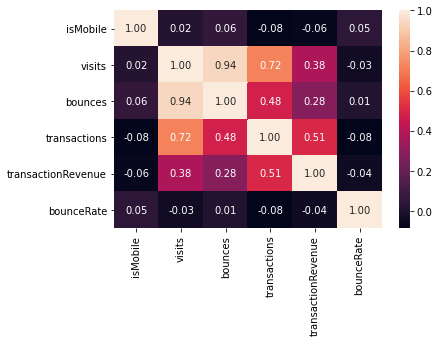

In [19]:
#Plotting correlation heat map
sns.heatmap(dfmc.corr(), annot = True, fmt = ".2f")
plt.show()

- From the correlation heat map we can see that number of visitis to the webpages has a significant impact on the number of transactions.
- From question 1 plot we can say that source of traffic also has a lot of influence on conversion.

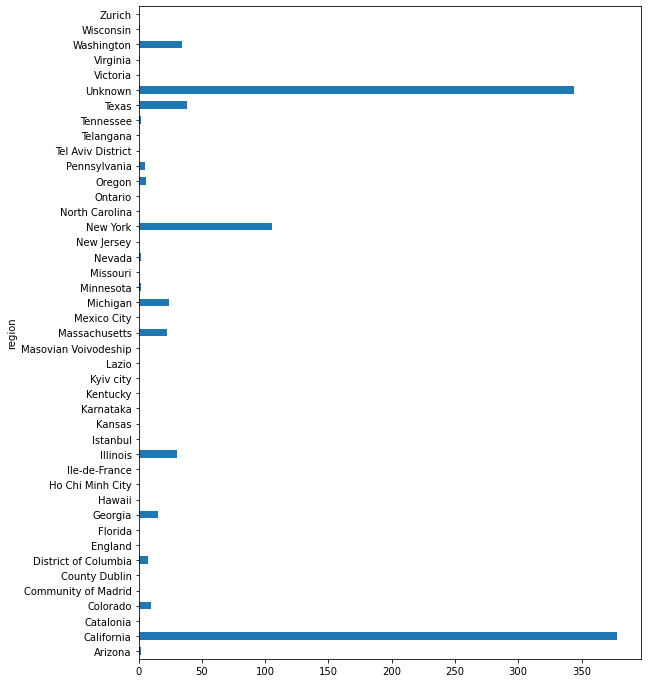

In [20]:
plt.figure(figsize=(9,12))
dfmc.groupby('region')['transactions'].sum().plot.barh()

- The purpose of the above graph is to check if there is any influence of region on conversion. While we have a lot of tranactions from California but we also have a lot of unknown regions and its difficult from the data we have to imply its significance.
- As we have only two months of data its not much usefull to see if time period has any significance.

### How complex are the paths a user takes to make a booking?

- Below we can see the most visited pages by the user.

In [21]:
dfpd.pagePath.value_counts()

/basket.html                                                                          5213
/home                                                                                 2326
/payment.html                                                                         2136
/ordercompleted.html                                                                  2086
/signin.html                                                                          1910
                                                                                      ... 
/google+redesign/nest/nest+usa/nest+cam+outdoor+security+camera+usa.axd                  1
/google+redesign/apparel/men+s+t+shirts/android+infant+short+sleeve+tee+pewter.axd       1
/google+redesign/electronics/accessories/google+flashlight.axd                           1
/google+redesign/apparel/women+s+google+yoga+jacket+sm.axd                               1
/google+redesign/office/writing/google+stylus+pen+w+led+light.axd                        1

In [22]:
dfpd.groupby(['fullVisitorId', 'visitId'])['pagePath'].count()

fullVisitorId  visitId   
6.911330e+15   1500268117     5
               1500442011    19
               1500919342     2
1.029510e+16   1501029862     7
               1501549997    35
                             ..
9.972640e+18   1501390392    17
9.973670e+18   1500870192     1
               1500930884     4
               1500930921    32
9.974350e+18   1500276722    40
Name: pagePath, Length: 2440, dtype: int64

- Here we can see the overview of number of paths a user takes while making a booking.
- Most of the users have multiple sessions and have visited multiple pages befor making a booking.
- Using GCP it would be easier to analyze the paths the user takes and view the navigation summary.

### What appears to be the biggest opportunity to drive incremental bookings?

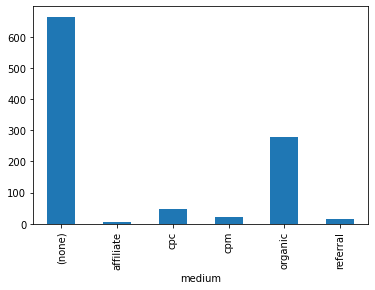

In [23]:
dfmc.groupby('medium')['transactions'].sum().plot.bar()

- when we look at the transactions from different sources we can see that cpm and cpc are currently low, these can provide us with a lot of opportunity for incrimental bookings.
- while the affiliate and referral have low bookings as well the bounce rate is more than 50% for those sources. By taking measure to improve the bounce rate we could see a growth in sales from these sources as well.